In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load dataset
df = pd.read_csv("D:\\ENV\\healthcare-dataset-stroke-data.csv")


In [3]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [4]:
print(df.shape)

(5110, 12)


In [5]:
print(df.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [6]:
print(df.head())
print(df.tail())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
         id  gender   age  hypertension  heart_disease e

In [7]:
print("Dimensions of DataFrame:", df.ndim)

Dimensions of DataFrame: 2


In [8]:
print("Duplicate rows:", df.duplicated().sum())


Duplicate rows: 0


In [9]:
# Remove 'Other' gender if it exists
if 'Other' in df['gender'].values:
    df.drop(df[df['gender'] == 'Other'].index, axis=0, inplace=True)


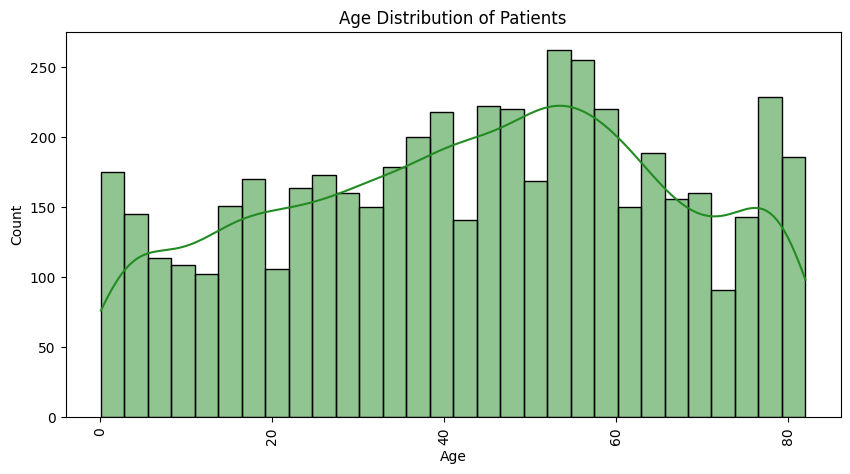

In [10]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True, color='forestgreen')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Patients")
plt.xticks(rotation=90)
plt.show()

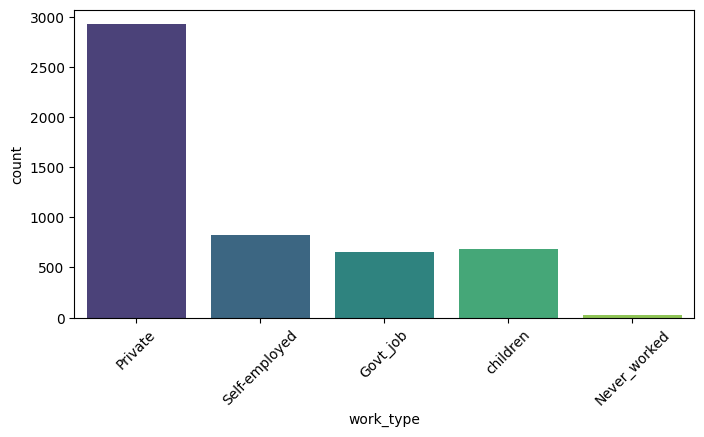

In [11]:
# Work type distribution
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='work_type', hue='work_type', palette='viridis', legend=False)
plt.xticks(rotation=45)
plt.show()

In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df.fillna({'bmi': df['bmi'].median()}, inplace=True)


In [14]:
# Convert categorical variables using One-Hot Encoding
df = pd.get_dummies(df, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

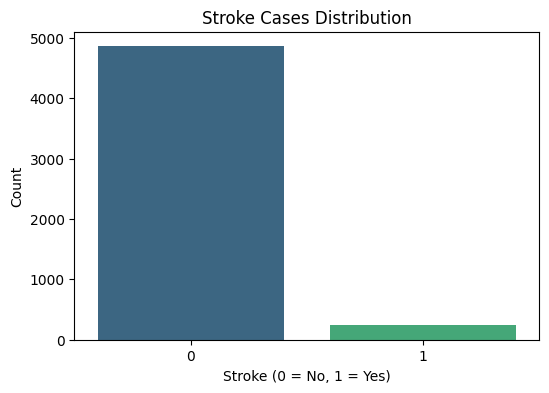

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='stroke', hue='stroke', palette="viridis", legend=False)
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Stroke Cases Distribution")
plt.show()


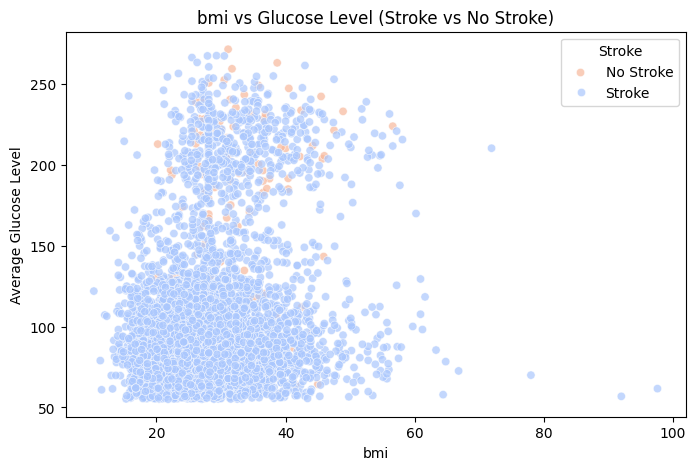

In [16]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['bmi'], y=df['avg_glucose_level'], hue=df['stroke'], palette="coolwarm", alpha=0.7)
plt.xlabel("bmi")
plt.ylabel("Average Glucose Level")
plt.title("bmi vs Glucose Level (Stroke vs No Stroke)")
plt.legend(title="Stroke", labels=["No Stroke", "Stroke"])
plt.show()

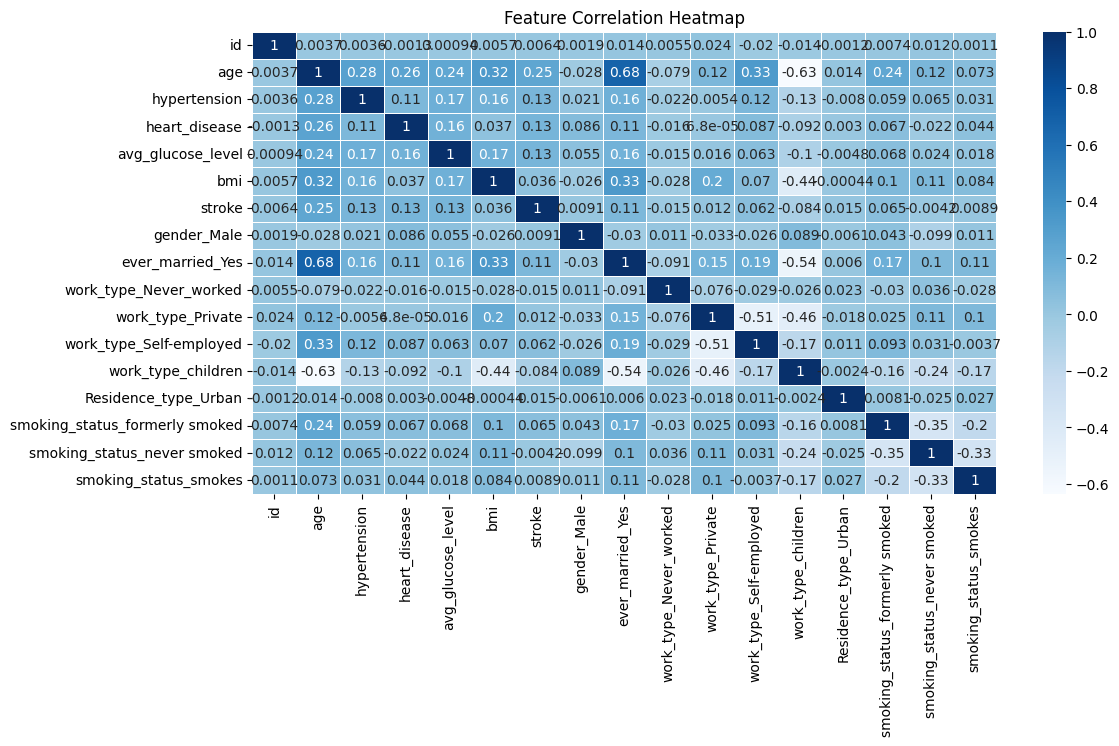

In [17]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='Blues', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

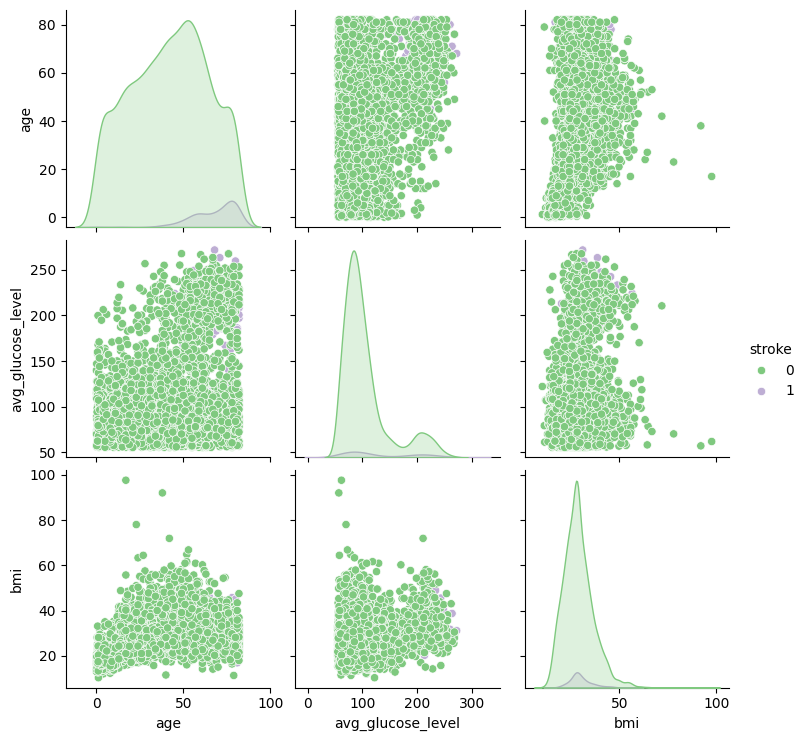

In [18]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke', palette="Accent")
plt.show()

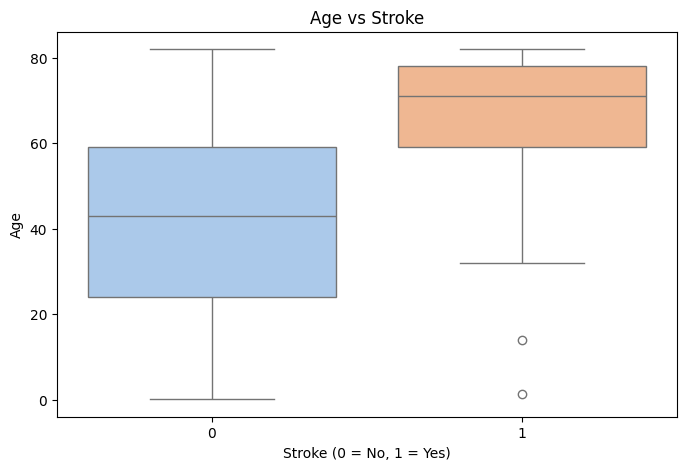

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="stroke", y="age", hue="stroke", palette="pastel", legend=False)
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.title("Age vs Stroke")
plt.show()


In [20]:
df.head()

id   age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0   9046  67.0             0              1             228.69  36.6       1   
1  51676  61.0             0              0             202.21  28.1       1   
2  31112  80.0             0              1             105.92  32.5       1   
3  60182  49.0             0              0             171.23  34.4       1   
4   1665  79.0             1              0             174.12  24.0       1   

   gender_Male  ever_married_Yes  work_type_Never_worked  work_type_Private  \
0         True              True                   False               True   
1        False              True                   False              False   
2         True              True                   False               True   
3        False              True                   False               True   
4        False              True                   False              False   

   work_type_Self-employed  work_type_children  Residence_type_Urban  \
0                    False               False                  True   
1                     True               False                 False   
2                    False               False                 False   
3                    False               False                  True   
4                     True               False                 False   

   smoking_status_formerly smoked  smoking_status_never smoked  \
0                            True                        False   
1                           False                         True   
2                           False                         True   
3                           False                        False   
4                           False                         True   

   smoking_status_smokes  
0                  False  
1                  False  
2                  False  
3                   True  
4                  False

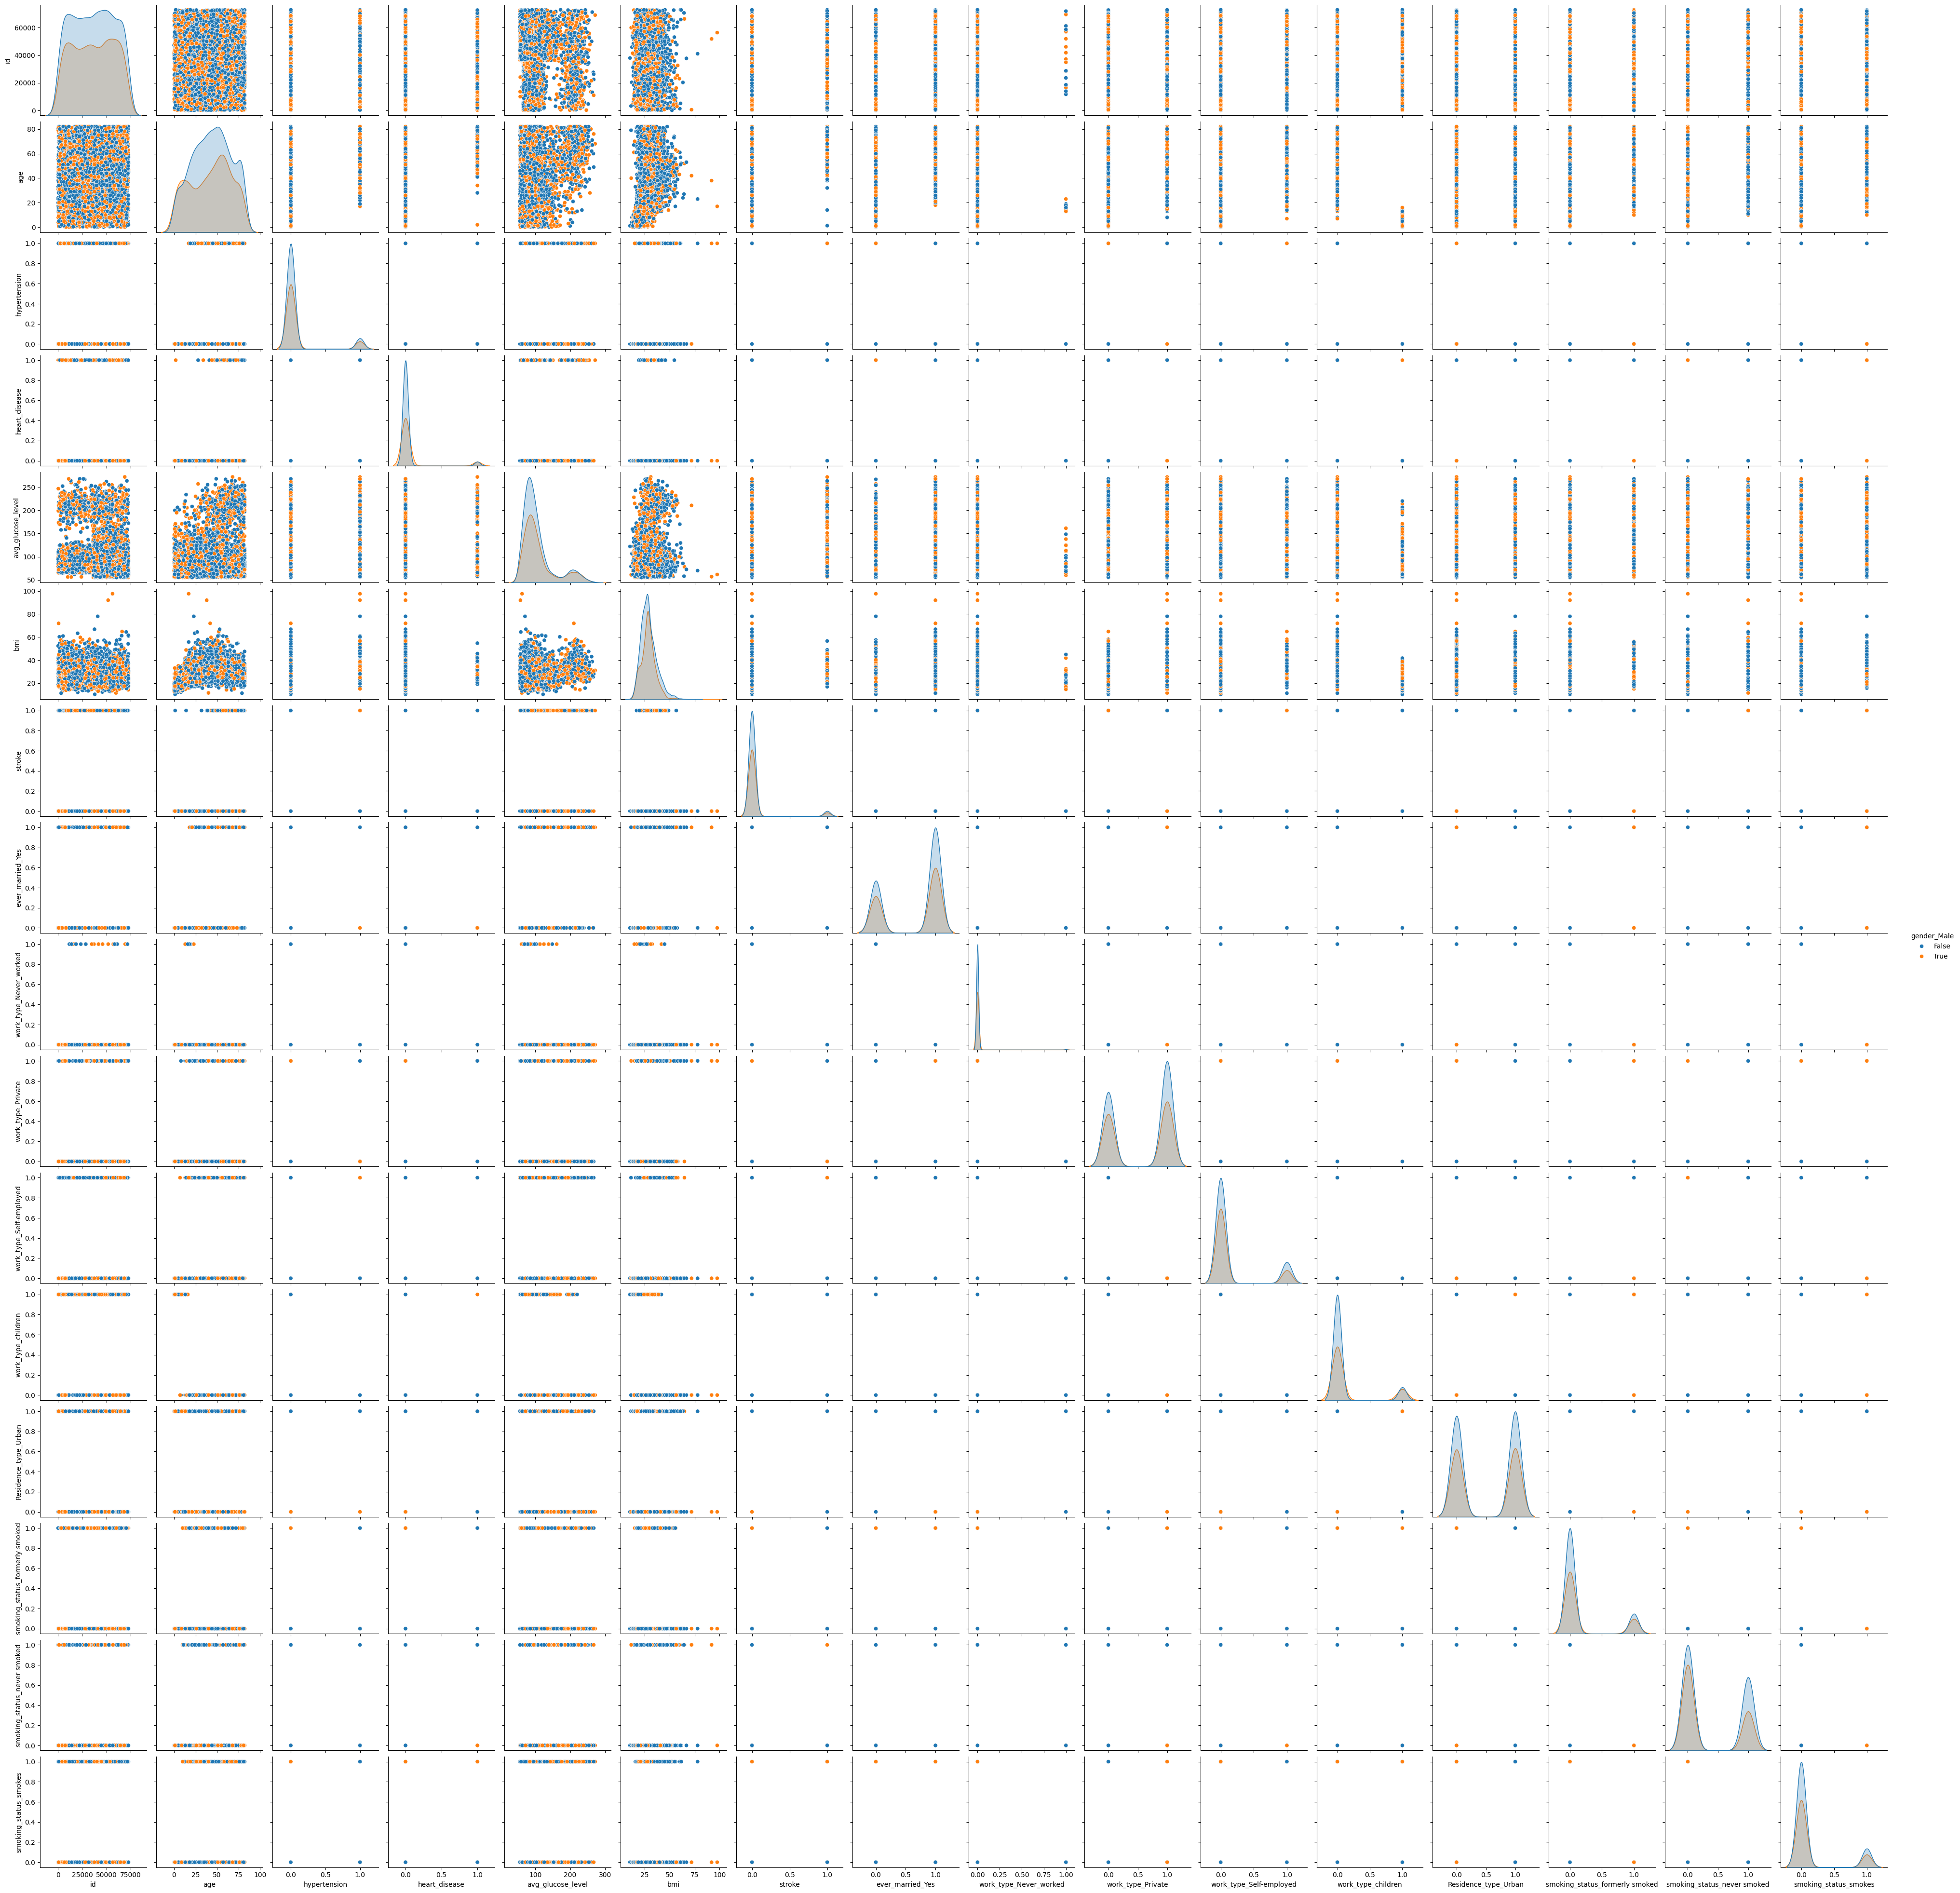

In [22]:
sns.pairplot(df,hue='gender_Male')

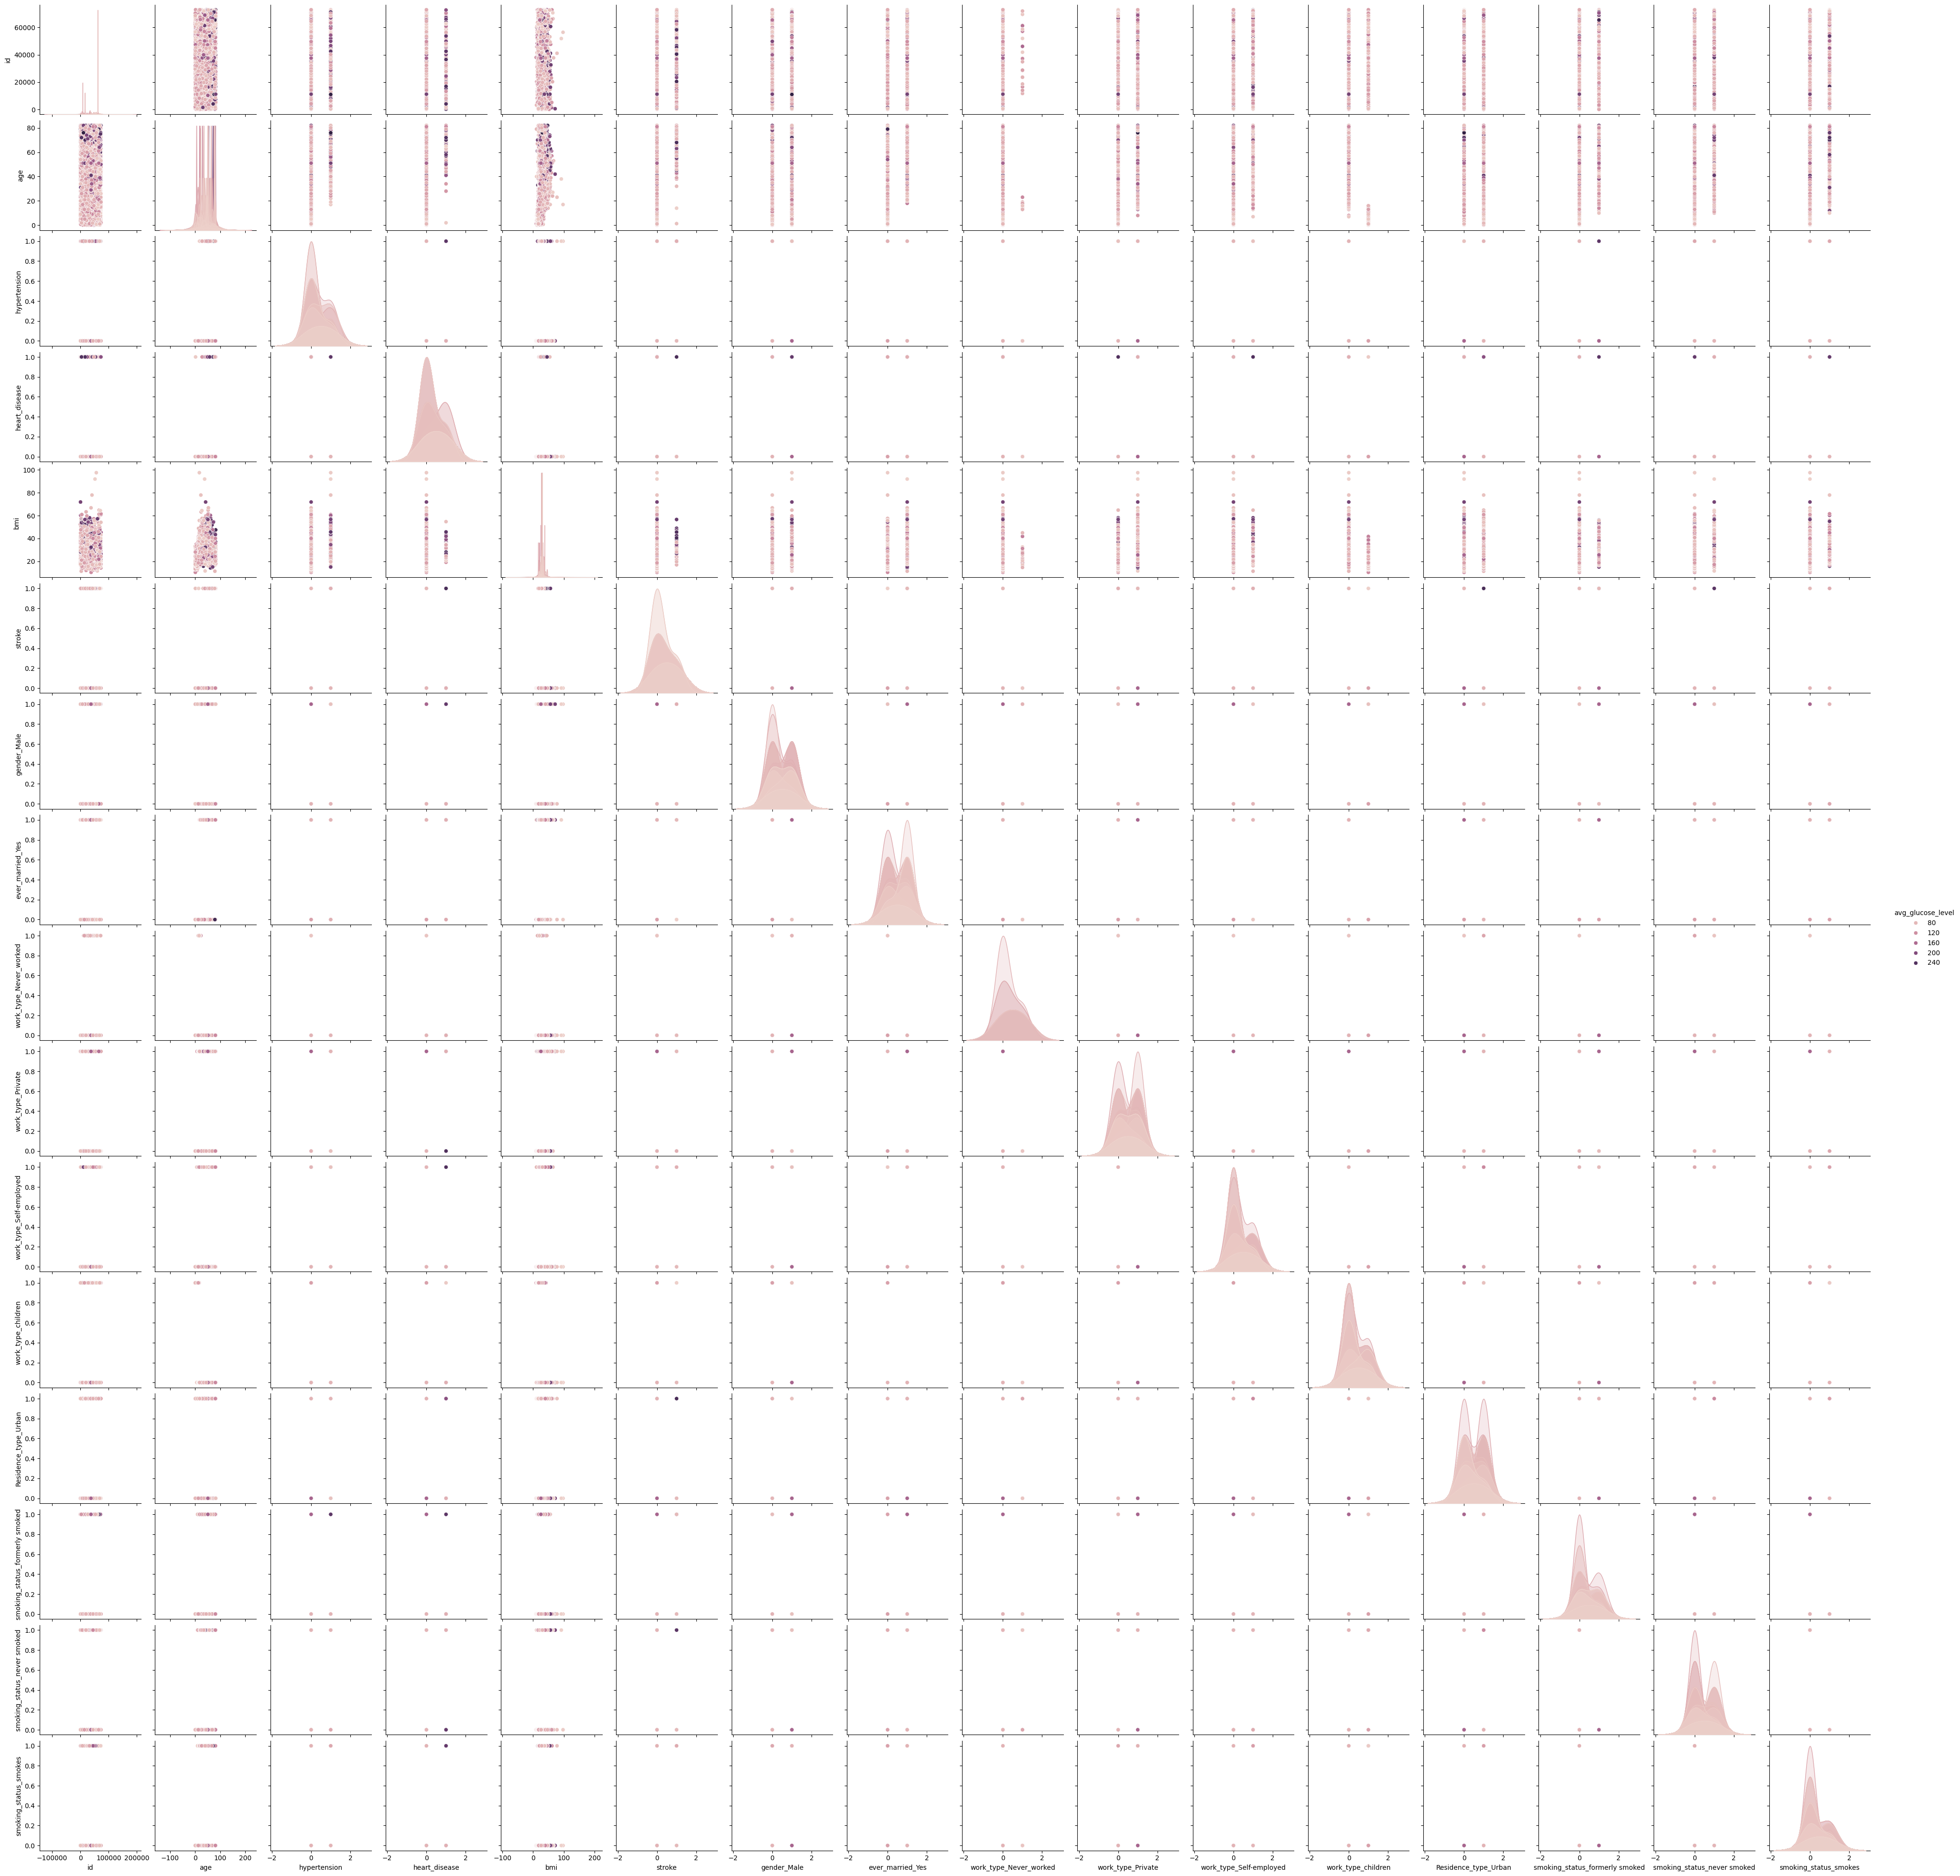

In [23]:
sns.pairplot(df,hue='avg_glucose_level')